In [25]:
from google.colab import drive

drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [26]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

df = pd.read_csv('/gdrive/MyDrive/AI_spark/date.csv')
df.head()



,일시,지점,평균기온(°C),일강수량(mm),sale
0,2021-01-01,108,-4.2,NaN,615110
1,2021-01-02,108,-5.0,NaN,296620
2,2021-01-04,108,-3.5,0.0,259900
3,2021-01-05,108,-5.5,0.0,248520
4,2021-01-06,108,-7.4,2.3,469800


In [27]:
df.dtypes

일시           object
지점            int64
평균기온(°C)    float64
일강수량(mm)    float64
sale          int64
dtype: object

             지점  평균기온(°C)  일강수량(mm)    sale
일시                                         
2021-01-31  108      -4.2       NaN  615110
2021-01-31  108      -5.0       NaN  296620
2021-01-31  108      -3.5       0.0  259900
2021-01-31  108      -5.5       0.0  248520
2021-01-31  108      -7.4       2.3  469800


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51216 missing from current font.
  font.set_text

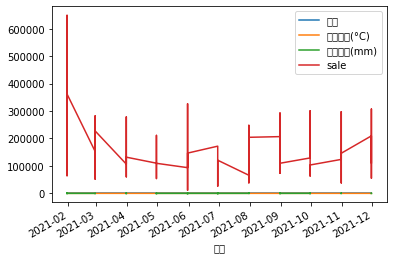

In [28]:
from pandas.tseries.offsets import MonthEnd 
df['일시'] = pd.to_datetime(df['일시']) + MonthEnd(1)
df = df.set_index('일시')

print(df.head()) 
df.plot()


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0, flags=flags)


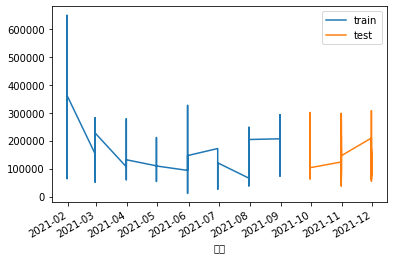

In [40]:
split_date = pd.Timestamp('9-01-2021')
# 2011/1/1 까지의 데이터를 트레이닝셋.
# 그 이후 데이터를 테스트셋으로 한다.

train = df.loc[:split_date, ['sale']]
test = df.loc[split_date:, ['sale']]
# Feature는 Unadjusted 한 개

ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [41]:

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

train_sc




array([[0.94698776],
       [0.44731723],
       [0.38970819],
       [0.37185441],
       [0.71901475],
       [1.        ],
       [0.5679636 ],
       [0.08278946],
       [0.431754  ],
       [0.23476624],
       [0.14857233],
       [0.37274867],
       [0.4355193 ],
       [0.33326012],
       [0.40116097],
       [0.26647317],
       [0.19312833],
       [0.14323816],
       [0.31644179],
       [0.19639159],
       [0.54992156],
       [0.22136806],
       [0.26732036],
       [0.15484782],
       [0.26132727],
       [0.16405711],
       [0.41501412],
       [0.23674302],
       [0.17048949],
       [0.42516473],
       [0.22121117],
       [0.27878883],
       [0.26137433],
       [0.35946031],
       [0.18834327],
       [0.25549106],
       [0.21932852],
       [0.22999686],
       [0.26733605],
       [0.14857233],
       [0.23642924],
       [0.06306872],
       [0.18669595],
       [0.33699404],
       [0.3387198 ],
       [0.14919987],
       [0.41826169],
       [0.183

In [42]:
train_sc_df = pd.DataFrame(train_sc, columns=['Scaled'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Scaled'], index=test.index)
train_sc_df.head()


,Scaled
일시,
2021-01-31,0.946988
2021-01-31,0.447317
2021-01-31,0.389708
2021-01-31,0.371854
2021-01-31,0.719015


In [43]:
for s in range(1, 31):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['Scaled'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['Scaled'].shift(s)

train_sc_df.head(13)



,Scaled,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,...,shift_21,shift_22,shift_23,shift_24,shift_25,shift_26,shift_27,shift_28,shift_29,shift_30
일시,,,,,,,,,,,,,,,,,,,,,
2021-01-31,0.946988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-31,0.447317,0.946988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-31,0.389708,0.447317,0.946988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-31,0.371854,0.389708,0.447317,0.946988,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-31,0.719015,0.371854,0.389708,0.447317,0.946988,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-31,1.000000,0.719015,0.371854,0.389708,0.447317,0.946988,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-31,0.567964,1.000000,0.719015,0.371854,0.389708,0.447317,0.946988,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-31,0.082789,0.567964,1.000000,0.719015,0.371854,0.389708,0.447317,0.946988,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-31,0.431754,0.082789,0.567964,1.000000,0.719015,0.371854,0.389708,0.447317,0.946988,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
X_train = train_sc_df.dropna().drop('Scaled', axis=1)
y_train = train_sc_df.dropna()[['Scaled']]

X_test = test_sc_df.dropna().drop('Scaled', axis=1)
y_test = test_sc_df.dropna()[['Scaled']]



In [45]:
X_train.head()

,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,...,shift_21,shift_22,shift_23,shift_24,shift_25,shift_26,shift_27,shift_28,shift_29,shift_30
일시,,,,,,,,,,,,,,,,,,,,,
2021-02-28,0.425165,0.170489,0.236743,0.415014,0.164057,0.261327,0.154848,0.267320,0.221368,0.549922,...,0.234766,0.431754,0.082789,0.567964,1.000000,0.719015,0.371854,0.389708,0.447317,0.946988
2021-02-28,0.221211,0.425165,0.170489,0.236743,0.415014,0.164057,0.261327,0.154848,0.267320,0.221368,...,0.148572,0.234766,0.431754,0.082789,0.567964,1.000000,0.719015,0.371854,0.389708,0.447317
2021-02-28,0.278789,0.221211,0.425165,0.170489,0.236743,0.415014,0.164057,0.261327,0.154848,0.267320,...,0.372749,0.148572,0.234766,0.431754,0.082789,0.567964,1.000000,0.719015,0.371854,0.389708
2021-02-28,0.261374,0.278789,0.221211,0.425165,0.170489,0.236743,0.415014,0.164057,0.261327,0.154848,...,0.435519,0.372749,0.148572,0.234766,0.431754,0.082789,0.567964,1.000000,0.719015,0.371854
2021-02-28,0.359460,0.261374,0.278789,0.221211,0.425165,0.170489,0.236743,0.415014,0.164057,0.261327,...,0.333260,0.435519,0.372749,0.148572,0.234766,0.431754,0.082789,0.567964,1.000000,0.719015


In [46]:
y_train.head()

,Scaled
일시,
2021-02-28,0.221211
2021-02-28,0.278789
2021-02-28,0.261374
2021-02-28,0.359460
2021-02-28,0.188343


In [47]:
X_train = X_train.values
X_test= X_test.values

y_train = y_train.values
y_test = y_test.values
print(X_train.shape)
print(X_train)
#print(y_train_shape)
print(y_train)


(188, 30)
[[0.42516473 0.17048949 0.23674302 ... 0.38970819 0.44731723 0.94698776]
 [0.22121117 0.42516473 0.17048949 ... 0.37185441 0.38970819 0.44731723]
 [0.27878883 0.22121117 0.42516473 ... 0.71901475 0.37185441 0.38970819]
 ...
 [0.22199561 0.18763728 0.10276122 ... 0.37102291 0.18418575 0.13429558]
 [0.27016003 0.22199561 0.18763728 ... 0.36764983 0.37102291 0.18418575]
 [0.25352997 0.27016003 0.22199561 ... 0.22168183 0.36764983 0.37102291]]
[[0.22121117]
 [0.27878883]
 [0.26137433]
 [0.35946031]
 [0.18834327]
 [0.25549106]
 [0.21932852]
 [0.22999686]
 [0.26733605]
 [0.14857233]
 [0.23642924]
 [0.06306872]
 [0.18669595]
 [0.33699404]
 [0.3387198 ]
 [0.14919987]
 [0.41826169]
 [0.18355821]
 [0.2282711 ]
 [0.10385943]
 [0.30508315]
 [0.34326953]
 [0.29579542]
 [0.12472545]
 [0.25690304]
 [0.15150612]
 [0.14389708]
 [0.07640414]
 [0.38939441]
 [0.29212425]
 [0.18685284]
 [0.32318795]
 [0.11484154]
 [0.26686539]
 [0.12613743]
 [0.25855036]
 [0.2803577 ]
 [0.19657986]
 [0.13853153]


In [49]:
X_test_t.shape

(51, 30, 1)

In [48]:
X_train_t = X_train.reshape(X_train.shape[0], 30, 1)
X_test_t = X_test.reshape(X_test.shape[0], 30, 1)

print("최종 DATA")
print(X_train_t.shape)
print(X_train_t)
print(y_train)



최종 DATA
(188, 30, 1)
[[[0.42516473]
  [0.17048949]
  [0.23674302]
  ...
  [0.38970819]
  [0.44731723]
  [0.94698776]]

 [[0.22121117]
  [0.42516473]
  [0.17048949]
  ...
  [0.37185441]
  [0.38970819]
  [0.44731723]]

 [[0.27878883]
  [0.22121117]
  [0.42516473]
  ...
  [0.71901475]
  [0.37185441]
  [0.38970819]]

 ...

 [[0.22199561]
  [0.18763728]
  [0.10276122]
  ...
  [0.37102291]
  [0.18418575]
  [0.13429558]]

 [[0.27016003]
  [0.22199561]
  [0.18763728]
  ...
  [0.36764983]
  [0.37102291]
  [0.18418575]]

 [[0.25352997]
  [0.27016003]
  [0.22199561]
  ...
  [0.22168183]
  [0.36764983]
  [0.37102291]]]
[[0.22121117]
 [0.27878883]
 [0.26137433]
 [0.35946031]
 [0.18834327]
 [0.25549106]
 [0.21932852]
 [0.22999686]
 [0.26733605]
 [0.14857233]
 [0.23642924]
 [0.06306872]
 [0.18669595]
 [0.33699404]
 [0.3387198 ]
 [0.14919987]
 [0.41826169]
 [0.18355821]
 [0.2282711 ]
 [0.10385943]
 [0.30508315]
 [0.34326953]
 [0.29579542]
 [0.12472545]
 [0.25690304]
 [0.15150612]
 [0.14389708]
 [0.076

In [51]:
from keras.layers import LSTM 
from keras.models import Sequential 
from keras.layers import Dense, Dropout
import keras.backend as K 
from keras.callbacks import EarlyStopping 

model = Sequential() # Sequeatial Model 
model.add(LSTM(25, input_shape=(30, 1), return_sequences=True)) # (timestep, feature) 
model.add(Dropout(0.2))
model.add(LSTM(25, input_shape=(30, 1), return_sequences=True)) # (timestep, feature) 
model.add(Dropout(0.2))
model.add(LSTM(25, input_shape=(30, 1))) # (timestep, feature) 
model.add(Dense(1)) # output = 1
model.compile(loss='mean_squared_error', optimizer='rmsprop')

model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 30, 25)            2700      
                                                                 
 dropout (Dropout)           (None, 30, 25)            0         
                                                                 
 lstm_2 (LSTM)               (None, 30, 25)            5100      
                                                                 
 dropout_1 (Dropout)         (None, 30, 25)            0         
                                                                 
 lstm_3 (LSTM)               (None, 25)                5100      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 12,926
Trainable params: 12,926
Non-trai

In [52]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

model.fit(X_train_t, y_train, epochs=100,
          batch_size=100, verbose=1)




Epoch 1/100
2/2 [==============================] - 9s 14ms/step - loss: 0.0318
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 0.0090
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 0.0081
Epoch 4/100
2/2 [==============================] - 0s 14ms/step - loss: 0.0080
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 0.0083
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 0.0096
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 0.0095
Epoch 8/100
2/2 [==============================] - 0s 12ms/step - loss: 0.0085
Epoch 9/100
2/2 [==============================] - 0s 11ms/step - loss: 0.0079
Epoch 10/100
2/2 [==============================] - 0s 12ms/step - loss: 0.0080
Epoch 11/100
2/2 [==============================] - 0s 12ms/step - loss: 0.0082
Epoch 12/100
2/2 [==============================] - 0s 12ms/step - loss: 0.0084
Epoch 13/100
2/2 [==============================]

In [54]:
print(X_test_t)

[[[0.44901161]
  [0.1761845 ]
  [0.14417948]
  ...
  [0.1451208 ]
  [0.24709758]
  [0.18449953]]

 [[0.22638845]
  [0.44901161]
  [0.1761845 ]
  ...
  [0.1675557 ]
  [0.1451208 ]
  [0.24709758]]

 [[0.25666771]
  [0.22638845]
  [0.44901161]
  ...
  [0.37260747]
  [0.1675557 ]
  [0.1451208 ]]

 ...

 [[0.20395356]
  [0.204738  ]
  [0.06871666]
  ...
  [0.12488233]
  [0.09021807]
  [0.25474584]]

 [[0.46438657]
  [0.20395356]
  [0.204738  ]
  ...
  [0.32011296]
  [0.12488233]
  [0.09021807]]

 [[0.29981174]
  [0.46438657]
  [0.20395356]
  ...
  [0.31816756]
  [0.32011296]
  [0.12488233]]]


In [59]:
y_pred = model.predict(X_test_t)
print(y_pred)

pd.DataFrame(y_pred).to_csv('/gdrive/MyDrive/AI_spark/y_pred.csv')
y_test = pd.DataFrame(y_test)
y_test.to_csv('/gdrive/MyDrive/AI_spark/y_test.csv')

[[0.23052049]
 [0.23074378]
 [0.23086694]
 [0.22995071]
 [0.22883232]
 [0.22817008]
 [0.22660722]
 [0.22538117]
 [0.22441138]
 [0.2238249 ]
 [0.22273263]
 [0.22096154]
 [0.22087824]
 [0.22027242]
 [0.22014388]
 [0.22069138]
 [0.22173809]
 [0.22106254]
 [0.2196269 ]
 [0.21901521]
 [0.21730766]
 [0.21538824]
 [0.21482801]
 [0.21435176]
 [0.21305202]
 [0.2113766 ]
 [0.21252781]
 [0.21220401]
 [0.21367095]
 [0.21402565]
 [0.2152506 ]
 [0.21602893]
 [0.2163082 ]
 [0.21702337]
 [0.21660052]
 [0.2157008 ]
 [0.21535444]
 [0.2141918 ]
 [0.21253131]
 [0.21076015]
 [0.20847091]
 [0.20646301]
 [0.20489763]
 [0.20367578]
 [0.20182498]
 [0.20020866]
 [0.19872779]
 [0.1983345 ]
 [0.19757289]
 [0.19816726]
 [0.1977002 ]]


In [60]:
# 평균 sale
df.mean()

지점             108.000000
평균기온(°C)        15.523077
일강수량(mm)         7.375940
sale        149090.675585
dtype: float64

In [61]:
mean = 149090.675585
# pred_input은 우리가 줄 값(사용자가 설정할 값)
#입력 받아야함!!!
input = # 2020-02-10
# 입력값의 sale값을 받아 x-train과 비슷한 값을 도출
pred_input = df.loc[ input, ['sale']]

y_pred = model.predict(pred_input)

if mean>y_pred:
  per = ((mean-y_pred)/mean)*100
  print("평균 매출보다", per,"% 더 낮은 판매량을 보이므로 이에 유의하여 재료를 준비해주세요")
elif mean<y_pred:
  per = -((mean-y_pred)/mean)*100
  print("평균 매출보다", per,"% 더 높은 판매량을 보이므로 이에 유의하여 재료를 준비해주세요")
else:
  print("평균 매출과 같은 판매량을 보이므로 이에 유의하여 재료를 준비해주세요")



SyntaxError: ignored